# Repte 1: Fashion

## Enunciat
Descarrega el dataset **fashion_mnist** de la secció de datasets de la llibreria TensorFlow i crea una xarxa neuronal capaç d'identificar les diferents peces de roba. Els valors de les etiquetes de sortida corresponen a les següents classes:

>0: T-shirt/top<br>
>1: Trouser<br>
>2: Pullover<br>
>3: Dress<br>
>4: Coat<br>
>5: Sandal<br>
>6: Shirt<br>
>7: Sneaker<br>
>8: Bag<br>
>9: Ankle boot<br>



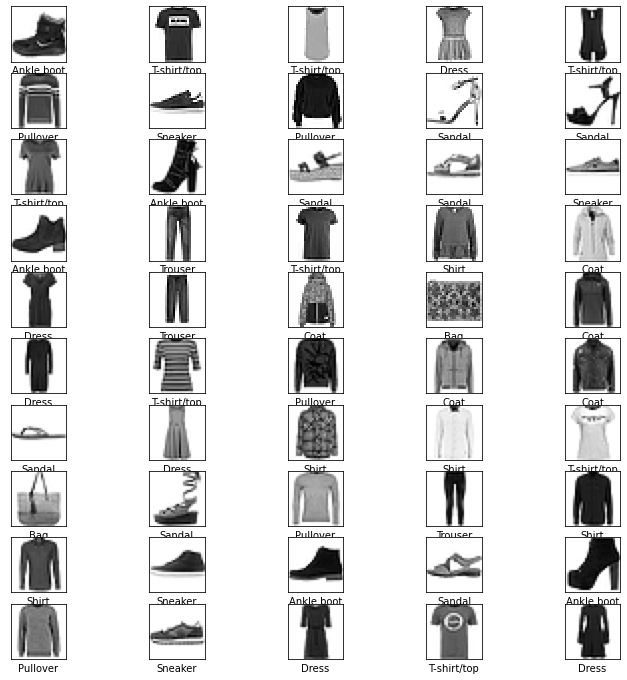

In [ ]:
# Importem llibreries
import tensorflow as tf
import keras as k
import numpy as np
import matplotlib.pyplot as plt

# Descarreguem el dataset
fashionData = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashionData.load_data()


In [ ]:

# Creem una llista amb els noms de les peces de roba 
clothes_list = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle", "boot"]
# Normalitzem dataset
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train /= 255
x_test /=  255

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


y_train = k.utils.to_categorical(y_train, 10)
y_test = k.utils.to_categorical(y_test, 10)


# Comprovem la forma de les dades
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

<ipython-input-3-44a0b3e786d9>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


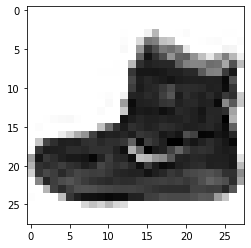

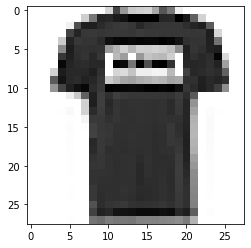

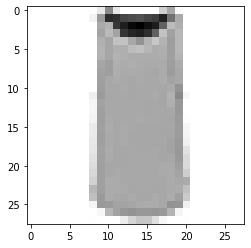

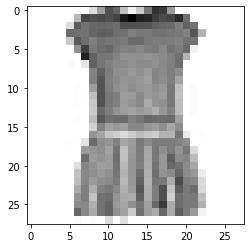

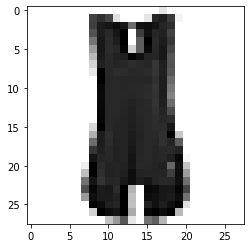

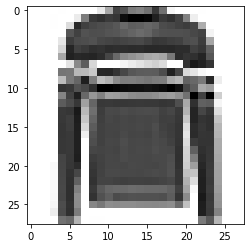

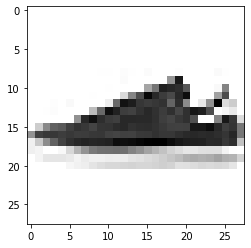

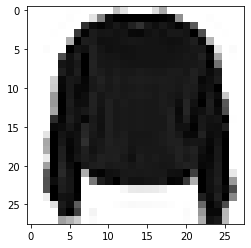

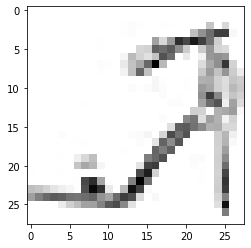

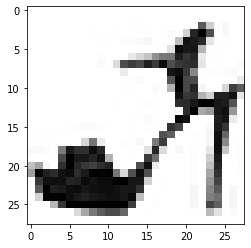

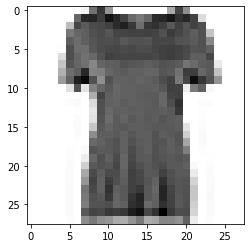

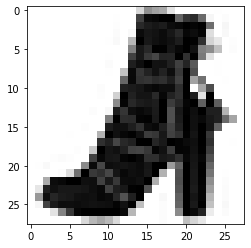

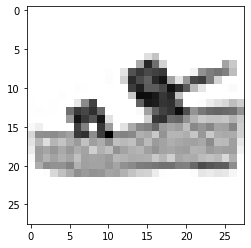

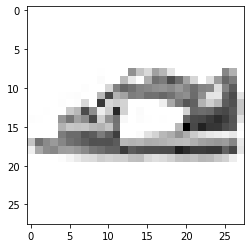

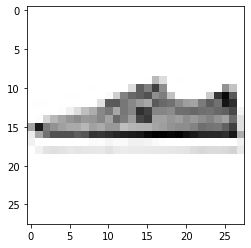

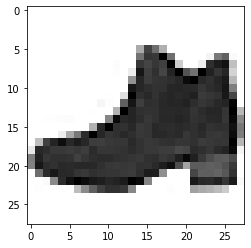

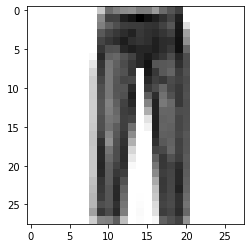

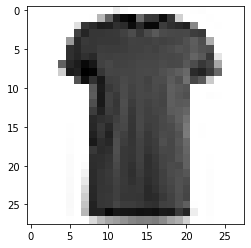

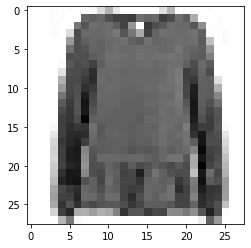

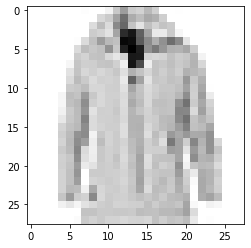

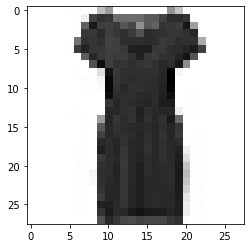

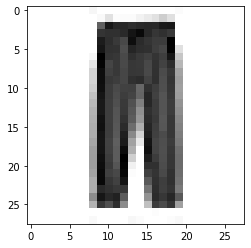

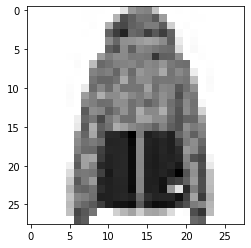

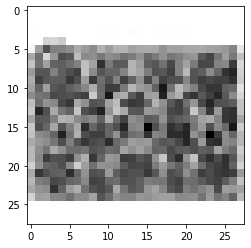

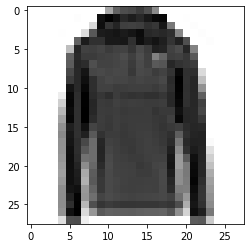

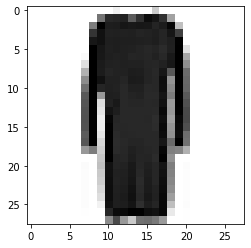

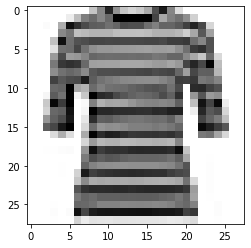

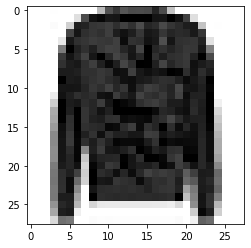

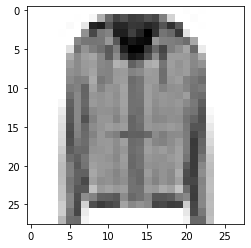

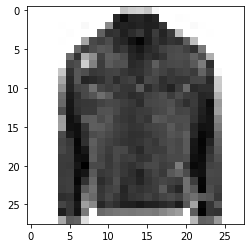

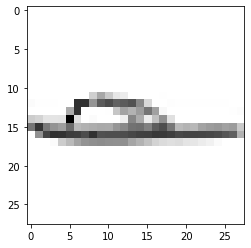

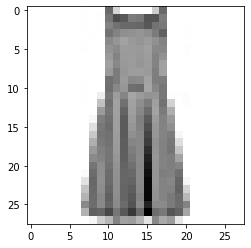

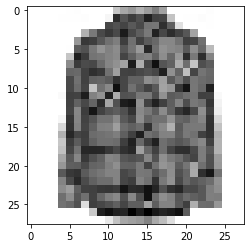

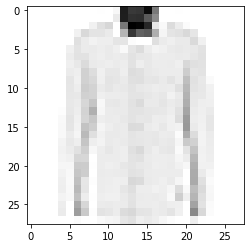

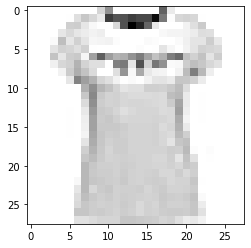

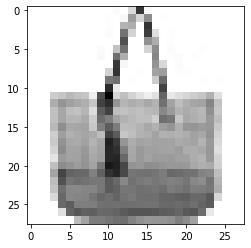

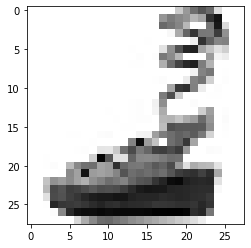

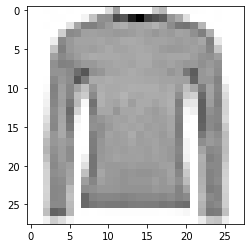

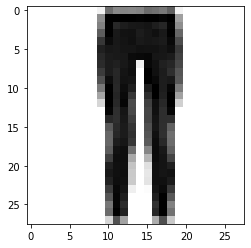

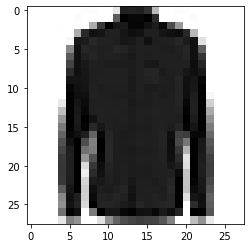

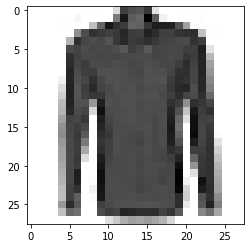

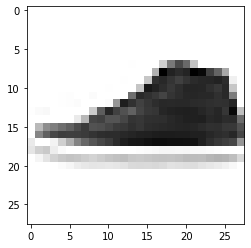

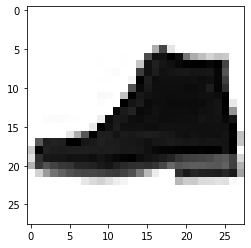

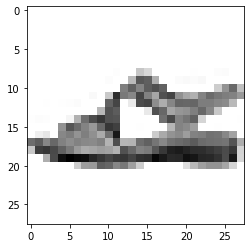

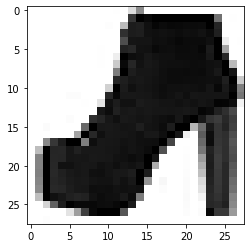

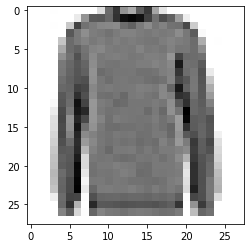

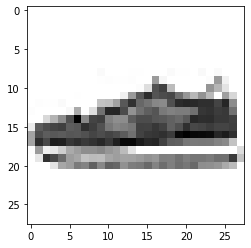

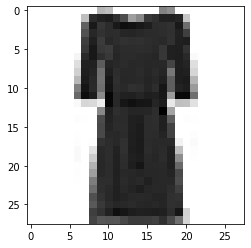

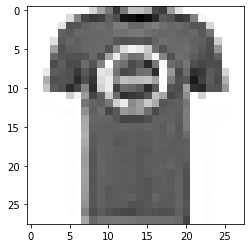

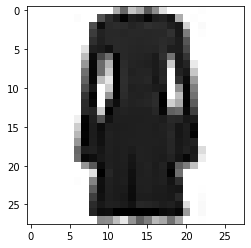

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualitzem les primeres 50 imatges
for i in range(0,50):
    plt.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary)  
    plt.figure()

# Alternativa:
# plt.imshow(x_train[:49].reshape(7,7,28,28).swapaxes(1,2).reshape(7*28,7*28), cmap=plt.cm.binary) 

In [ ]:

# Definim el model de xarxa neuronal
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# Si fem servir la capa keras.layers.Flatten() ens podem estalviar fer reshape
model.add(Dense(10, activation = 'sigmoid', input_shape=(784,)))
# de les dades d'entrada
model.add(Dense(10, activation = 'softmax'))
# Mostrem el resum del model creat
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Configurem l'entrenament del nostre model de xarxa neuronal

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

#inici de l'entrenament

model.fit(x_train, y_train, epochs = 1)

1875/1875 [==============================] - 3s 2ms/step - loss: 1.8359 - accuracy: 0.4155


In [ ]:
# Evaluem el model amb el conjunt de dades de test
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test lost', test_loss)
print('test accuracy', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 1.5134 - accuracy: 0.5262
test lost 1.5133776664733887
test accuracy 0.526199996471405


1/1 [==============================] - 0s 69ms/step
[[0.08015023 0.44279322 0.05697141 0.08633555 0.10839103 0.04867052
  0.09981474 0.02359106 0.02419901 0.02908316]]
Número prediccio: 1
resposta: 1
resposta: Trouser


<Figure size 432x288 with 0 Axes>

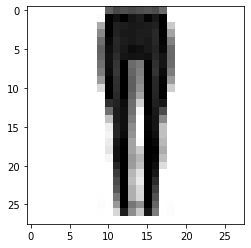

<Figure size 432x288 with 0 Axes>

In [ ]:
# Mostra la predicció que realitza la Xarxa neuronal de la imatge de test 777,
# la resposta correcta i la imatge corresponent
prediccio = model.predict(np.array([x_test[777]]))
print(prediccio)
print(f'Número prediccio: {np.argmax(prediccio)}')
print(f'resposta: {np.argmax(y_test[777])}')
print(f'resposta: {clothes_list[np.argmax(y_test[777])]}')
plt.imshow(x_test[777].reshape(28,28),cmap = plt.cm.binary)
plt.figure()

## Part opcional 1

In [ ]:
# Canvia l'optimitzador del model per tal d'obtenir una xarxa neuronal que
# millori l'encert del model anterior
model2 = Sequential()
model2.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=100)


Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9547 - accuracy: 0.7480
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5278 - accuracy: 0.8284
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4640 - accuracy: 0.8414
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4379 - accuracy: 0.8476
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4223 - accuracy: 0.8534
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4108 - accuracy: 0.8567
Epoch 7/100
 759/1875 [===========>..................] - ETA: 1s - loss: 0.4031 - accuracy: 0.8601

In [ ]:
test_loss, test_acc = model2.evaluate(x_test, y_test)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

## Part opcional 2

In [ ]:
# Mostra les 14 primeres imatges de test, cada una amb un histograma al costat
# on es visualitzi la probabilitat de pertànyer a cada una de les classes

fig, ax = plt.subplots(14, 2)
fig.set_size_inches(15, 30)
for i in range(14):
    ax[i, 0].imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary)
    ax[i,1].bar(clothes_list, model2.predict(np.array([x_test[i]]))[0]*1000/28)